In [16]:
from matplotlib import pyplot as plt
# from brokenaxes import brokenaxes
import numpy as np
import os
import sys
import matplotlib.ticker as mticker
from matplotlib.ticker import FuncFormatter

my_figsize = [10, 8]
my_fontsize = 45
WIDTH = 0.05  # the width of the bars
SHORT = 10000 # 10KB
LONG = 100000 # 100KB
LOADS = ['0.1', '0.25', '0.5', '0.75', '1']
labels = ['10', '25', '50', '75', '100'] # LOADS

# LOADS = [2, 4, 6, 8, 10, 12, 14, 16]
# labels = [2, 4, 6, 8, 10, 12, 14, 16]
# LOADS = [2, 4, 6, 8, 10, 15, 20, 30, 40, 50]
# labels = [2, 4, 6, 8, 10, 15, 20, 30, 40, 50]

# LOADS = ['0.25']
# labels = ['2', '3', '4', '5', '6']
# WORKLOADS = ['W1', 'W2', 'W3', 'W4']
WORKLOADS = ['W4']
# WORKLOADS = ['incast']
# WORKLOADS = ['uniformincast']

GOSSIP = [300]

SCHEDULED = [30]

# PIAS = ['PIAS', 'NO-PIAS']
PIAS = ['NO-PIAS']


METRICS = ['FCT', 'GOODPUT']


os.chdir(sys.path[0])
os.chdir('./')

# SCHEMES = ['NegotiaToR', 'PIM']
# SCHEMES = ['NegotiaToR-8uplinks', 'benes-vlb1', 'benes-vlb1.5', 'benes-vlb2']
# SCHEMES = ['1', 'single_dst_grant']
# SCHEMES = ['100G', '200G', '300G', 'benes-vlb1']
# SCHEMES = ['1', '2', '3', '4', '5']
# SCHEMES = ['1', '2p', '3p', '4p', '5p']
# SCHEMES = ['benes/1_new', 'benes-vlb/1', 'benes/2_new', 'benes-vlb/2']
# SCHEMES = ['ITER_1', 'ITER_2', 'ITER_3', 'ITER_4', 'ITER_5', 'ITER_6', 'ITER_7']
# SCHEMES = ['50', '100', '150', '200', '250']
# SCHEMES = ['ITER_1', 'ITER_3', 'ITER_5', 'ITER_7']
# SCHEMES = ['NegotiaToR-iterative/tmp/1', 'NegotiaToR-iterative/tmp/2', 'NegotiaToR-iterative/tmp/3', 'NegotiaToR-iterative/tmp/4','NegotiaToR-iterative/tmp/5']
# SCHEMES = ['NegotiaToR/tmp/1', 'NegotiaToR/tmp/2', 'NegotiaToR/tmp/3', 'NegotiaToR/tmp/4','NegotiaToR/tmp/5']
# Pias = ['PIAS', 'No-PIAS']
Pias = ['PIAS']
# Topo = ['Benes', 'Big-Switch']
Topo = ['Benes']
Algo = ['NegotiaToR','VLB']
# Algo = ['VLB']
Iter = ['ITER_1', 'ITER_2', 'ITER_3', 'ITER_4']
# Iter = ['ITER_1']
Acc =  ['ACC_1', 'ACC_2', 'ACC_3', 'ACC_4', 'ACC_5']
# Acc =  ['ACC_5']
SCHEMES = Iter
# SCHEMES = ['VLB/ITER_1/ACC_1', 'VLB/ITER_1/ACC_2', 'VLB/ITER_1/ACC_3', 'VLB/ITER_1/ACC_4', 'VLB/ITER_1/ACC_5', 'NegotiaToR/ITER_1/ACC_1', 'NegotiaToR/ITER_1/ACC_2','NegotiaToR/ITER_1/ACC_3', 'NegotiaToR/ITER_1/ACC_4','NegotiaToR/ITER_1/ACC_5']
# DATA_DIR_TEMP = '../DATA/NegotiaToR/{pias}/{scheme}/ACC_3/DATA_vote_{workload}_{load}_scheduled_{scheduled}/'
DATA_DIR_TEMP = '../DATA/PIAS/Big-Switch/NegotiaToR/{scheme}/ACC_2/DATA_vote_W4_{load}/'
# DATA_DIR_TEMP = '../DATA/PIAS/Benes/{scheme}/ITER_1/ACC_2/DATA_vote_W4_{load}/'



FIG_FILE_NAME = WORKLOADS[0]
FIGURE_DIR = '../FIGS/'+ FIG_FILE_NAME +'/GOODPUT/'
if not os.path.exists(FIGURE_DIR):
    os.makedirs(FIGURE_DIR)

data = {}
for scheme in SCHEMES:
    data[scheme] = {}
    for pias in PIAS:
        data[scheme][pias] = {}
        for workload in WORKLOADS:
            data[scheme][pias][workload] = {}
            for load in LOADS:
                data[scheme][pias][workload][load] = {}
                for gossip in GOSSIP:
                    data[scheme][pias][workload][load][gossip] = {}
                    for scheduled in SCHEDULED:
                        data[scheme][pias][workload][load][gossip][scheduled] = {}
                    
                
for scheme in SCHEMES:
    for pias in PIAS:
        for workload in WORKLOADS:
            for load in LOADS:
                for gossip in GOSSIP:
                    for scheduled in SCHEDULED:
                        dir_path = DATA_DIR_TEMP.format(pias=pias, scheme=scheme, workload=workload, load=load, gossip=gossip, scheduled=scheduled)
                        data[scheme][pias][workload][load]['PATH'] = dir_path
                        for metric in METRICS:
                            data_path = dir_path + metric + '.txt'
                            data[scheme][pias][workload][load][gossip][scheduled][metric] = np.loadtxt(data_path)
                            print("LOADED: ", scheme, pias, workload, load, gossip, scheduled, metric)

for scheme in SCHEMES:
    for pias in PIAS:
        for workload in WORKLOADS:
            for load in LOADS:
                for gossip in GOSSIP:
                    for scheduled in SCHEDULED:
                        data[scheme][pias][workload][load][gossip][scheduled]['SHORT_IDX'] = data[scheme][pias][workload][load][gossip][scheduled]['FCT'][:, 4] < SHORT
                        data[scheme][pias][workload][load][gossip][scheduled]['LONG_IDX'] = data[scheme][pias][workload][load][gossip][scheduled]['FCT'][:, 4] > LONG
                        data[scheme][pias][workload][load][gossip][scheduled]['MIDDLE_IDX'] = (data[scheme][pias][workload][load][gossip][scheduled]['FCT'][:, 4] >= SHORT) * (data[scheme][pias][workload][load][gossip][scheduled]['FCT'][:, 4] <= LONG)

# WIDTH = 0.05  # the width of the bars


# grid = plt.GridSpec(2, 2, wspace=0.4, hspace=0.3)

LOADED:  ITER_1 NO-PIAS W4 0.1 300 30 FCT
LOADED:  ITER_1 NO-PIAS W4 0.1 300 30 GOODPUT
LOADED:  ITER_1 NO-PIAS W4 0.25 300 30 FCT
LOADED:  ITER_1 NO-PIAS W4 0.25 300 30 GOODPUT
LOADED:  ITER_1 NO-PIAS W4 0.5 300 30 FCT
LOADED:  ITER_1 NO-PIAS W4 0.5 300 30 GOODPUT
LOADED:  ITER_1 NO-PIAS W4 0.75 300 30 FCT
LOADED:  ITER_1 NO-PIAS W4 0.75 300 30 GOODPUT
LOADED:  ITER_1 NO-PIAS W4 1 300 30 FCT
LOADED:  ITER_1 NO-PIAS W4 1 300 30 GOODPUT
LOADED:  ITER_2 NO-PIAS W4 0.1 300 30 FCT
LOADED:  ITER_2 NO-PIAS W4 0.1 300 30 GOODPUT
LOADED:  ITER_2 NO-PIAS W4 0.25 300 30 FCT
LOADED:  ITER_2 NO-PIAS W4 0.25 300 30 GOODPUT
LOADED:  ITER_2 NO-PIAS W4 0.5 300 30 FCT
LOADED:  ITER_2 NO-PIAS W4 0.5 300 30 GOODPUT
LOADED:  ITER_2 NO-PIAS W4 0.75 300 30 FCT
LOADED:  ITER_2 NO-PIAS W4 0.75 300 30 GOODPUT
LOADED:  ITER_2 NO-PIAS W4 1 300 30 FCT
LOADED:  ITER_2 NO-PIAS W4 1 300 30 GOODPUT
LOADED:  ITER_3 NO-PIAS W4 0.1 300 30 FCT
LOADED:  ITER_3 NO-PIAS W4 0.1 300 30 GOODPUT
LOADED:  ITER_3 NO-PIAS W4 0.25 

{'ITER_1': {'NO-PIAS': [0.023991534417037073, 0.031381555918927315, 0.05398174584704133, 0.10181109135041906, 0.16795796965597146]}, 'ITER_2': {'NO-PIAS': [0.02665895321765361, 0.036154375725137036, 0.05754986631967437, 0.09478676822745105, 0.1462990557906436]}, 'ITER_3': {'NO-PIAS': [0.03072714881605826, 0.04365003605482715, 0.06686887737623015, 0.1033491799597156, 0.14918986116299499]}, 'ITER_4': {'NO-PIAS': [0.03566088131072381, 0.05138517105345111, 0.07737691607547091, 0.11397353432539076, 0.15785447558096583]}}
{'ITER_1': {'NO-PIAS': [0.013039582802587544, 0.013171155054871873, 0.013614333740816774, 0.015937419324130172, 0.019247768053745055]}, 'ITER_2': {'NO-PIAS': [0.017965569195359514, 0.019162461054618152, 0.019783027746225198, 0.02057437956825225, 0.0237477274346176]}, 'ITER_3': {'NO-PIAS': [0.023704914988700303, 0.025453564051005628, 0.025706869466697313, 0.02683890762317453, 0.02797512822650282]}, 'ITER_4': {'NO-PIAS': [0.027442708000382503, 0.029386570078235863, 0.02996312

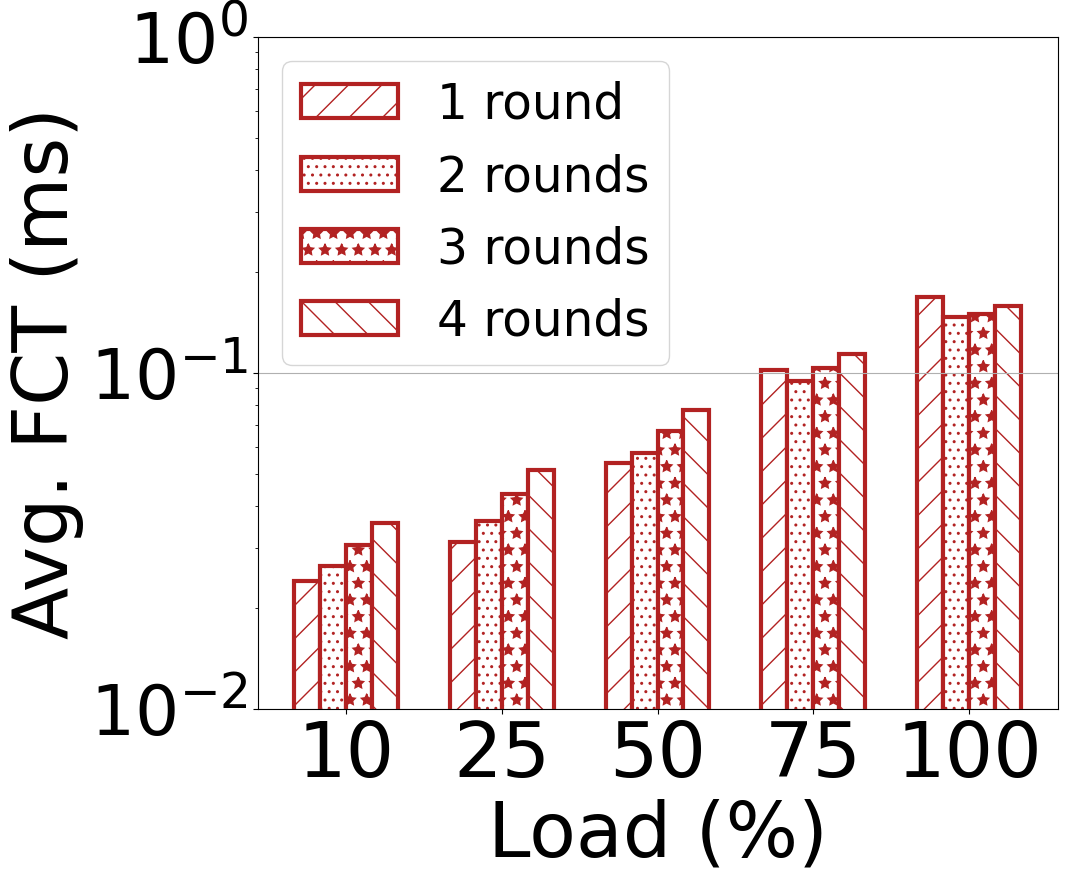

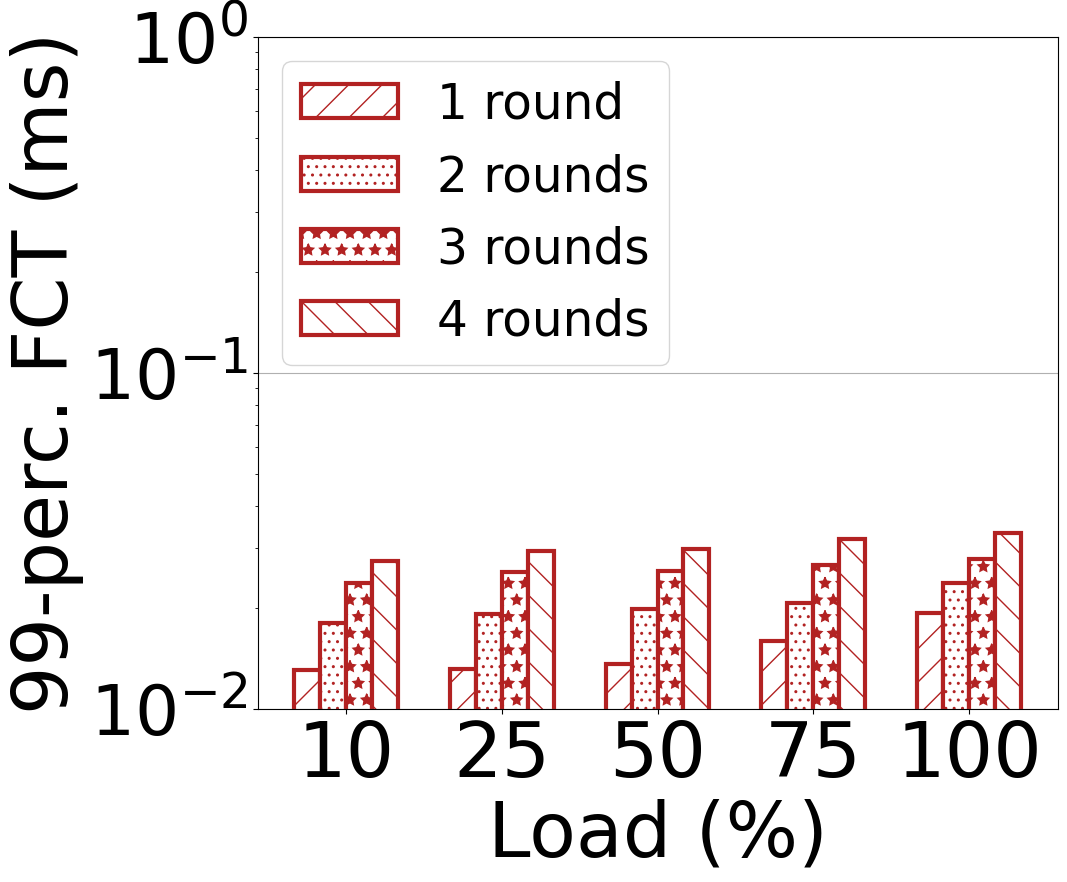

In [24]:

my_figsize = [10, 8]
my_fontsize = 55
WIDTH = 0.05  # the width of the bars
hatches = ["/", "..", "*", "\\", "/", "x", "o"]
colors = ["white", "white", "white", "white", "white", "white", "white"]
# SCHEMES_label = ['Traffic Oblivious (1x)', 'Traffic Oblivious (2x)', 'Traffic Oblivious (3x)', 'Traffic Oblivious (4x)', 'Traffic Oblivious (5x)', 'NegotiaToR (1x)', 'NegotiaToR (2x)', 'NegotiaToR (3x)' , 'NegotiaToR (4x)', 'NegotiaToR (5x)']
# SCHEMES_label = ['NegotiaToR (2x)', 'Traffic Oblivious (2x)']
SCHEMES_label = ['1 round', '2 rounds', '3 rounds', '4 rounds', '5 rounds', '6 orunds', '7 rounds']
def slowdown_bar_plot(mode, labels, workload, flow_range='all'):

    results = {}
    for i, scheme in enumerate(SCHEMES):
        results[scheme] = {}
        for pias in PIAS:
            results[scheme][pias] = []
            for load in LOADS:

                if flow_range == 'Mice':
                    idx = data[scheme][pias][workload][load][gossip][scheduled]['SHORT_IDX']
                elif flow_range == 'Elephant':
                    idx = data[scheme][pias][workload][load][gossip][scheduled]['LONG_IDX']
                elif flow_range == 'middle':
                    idx = data[scheme][pias][workload][load][gossip][scheduled]['MIDDLE_IDX']
                elif flow_range == 'all':
                    idx = np.arange(len(data[scheme][pias][workload][load][gossip][scheduled]['FCT']))

                available_idx = data[scheme][pias][workload][load][gossip][scheduled]['FCT'][:, 7] > 0 # 过滤未完成的流
                idx = idx * available_idx

                fct = data[scheme][pias][workload][load][gossip][scheduled]['FCT'][idx, 7] # fct

                if i < 5:
                    if mode == 'Mean':
                        results[scheme][pias].append(np.mean(fct) * 1e3)
                    elif mode == 'Median':
                        results[scheme][pias].append(np.percentile(fct, 50) * 1e3)
                    elif mode == '99p':
                        results[scheme][pias].append(np.percentile(fct, 99) * 1e3)
                
                if i >= 5:
                    if mode == 'Mean':
                        results[scheme][pias].append(np.mean(fct) * 1e3)
                    elif mode == 'Median':
                        results[scheme][pias].append(np.percentile(fct, 50) * 1e3)
                    elif mode == '99p':
                        results[scheme][pias].append(np.percentile(fct, 99) * 1e3)



    print(results)


    # SCHEMES_label = SCHEMES
    # SCHEMES_label = ['NegotiaToR(1x)', 'Benes-VLB(1x)', 'Benes-VLB(1.5x)', 'Benes-VLB(2x)']
    # SCHEMES_label = ['NegotiaToR', 'PIM']
    # SCHEMES_label = ['multi_dst_grant', 'single_dst_grant']
    # SCHEMES_label = ['100G', '200G', '300G', '400G']
    # SCHEMES_label = ['NegotiaToR(1x)', 'NegotiaToR(2x)', 'NegotiaToR(3x)', 'NegotiaToR(4x)', 'NegotiaToR(5x)']
    # SCHEMES_label = ['Sirius(1x)', 'Sirius(2x)', 'Sirius(3x)', 'Sirius(4x)', 'Sirius(5x)']
    # SCHEMES_label = ['NegotiaToR(old)', 'NegotiaToR(new)', 'NegotiaToR(2x)', 'VLB(2x)']
    # SCHEMES_label = ['1-iterative', '3-iterative', '5-iterative', '7-iterative']
    # SCHEMES_label = ['ITER_1', 'ITER_2', 'ITER_3', 'ITER_4', 'ITER_5', 'ITER_6', 'ITER_7']
    # SCHEMES_label = ['VLB(1x)', 'VLB(2x)', 'VLB(3x)', 'VLB(4x)', 'VLB(5x)']


    for pias in PIAS:
        x_tick = np.arange(len(labels))*0.3 # the label locations
        x = x_tick - (len(SCHEMES)-1)*WIDTH/2

        fig, ax = plt.subplots(figsize=my_figsize)
        plt.subplots_adjust(left=0.16, right=0.96, bottom=0.15, top=0.99)
        
        ax.grid(axis='y')
        
        for i, scheme in enumerate(SCHEMES):
            # ax.bar(x + WIDTH*i, results[scheme][mode], WIDTH, label=scheme)
            # 一次画一个scheme的所有load的bar
            # bound = len(SCHEMES_label) / 2
            # if i < bound:
            #     ax.bar(x + WIDTH*i, results[scheme][pias], WIDTH, edgecolor="firebrick", label=SCHEMES_label[i], linewidth = 3, color=[colors[i]], hatch=hatches[i])
            # else:
            #     ax.bar(x + WIDTH*i, results[scheme][pias], WIDTH, edgecolor="darkblue", label=SCHEMES_label[i], linewidth = 3, color=[colors[i]], hatch=hatches[i])
            ax.bar(x + WIDTH*i, results[scheme][pias], WIDTH, edgecolor="firebrick", label=SCHEMES_label[i], linewidth = 3, color=[colors[i]], hatch=hatches[i])





        

        if mode == "Mean":
            # ax.set_ylabel('Avg. FCT of ' + flow_range + " (ms)", fontsize=my_fontsize)
            ax.set_ylabel('Avg. FCT (ms)', fontsize=my_fontsize)
        elif mode == "99p":
            ax.set_ylabel('99-perc. FCT (ms)', fontsize=my_fontsize)
        else:
            ax.set_ylabel('FCT of ' + flow_range + " (ms)", fontsize=my_fontsize)
        # ax.set_xlabel("Incast Degree", fontsize=my_fontsize)
        # ax.set_title('Accelerate by adding line rate', fontsize=my_fontsize)
        ax.set_xlabel("Load (%)", fontsize=my_fontsize)
        ax.set_xticks(x_tick)
        ax.set_yscale("log")
        ax.set_ylim(10**-2, 10**0)

        plt.xticks(fontsize=my_fontsize-5)
        plt.yticks(fontsize=my_fontsize-5)


        ax.set_xticklabels(labels, fontsize=my_fontsize)
        


        # scientific_formatter = FuncFormatter(scientific)
        # ax.yaxis.set_major_formatter(scientific_formatter)
        # ax.yaxis.set_minor_formatter(mticker.ScalarFormatter())

        # ax.set_yscale('log')
        # ax.ticklabel_format( style='plain', axis='y')

        # ax.set_yscale('log')

        # ax.set_ylim([0.0001,1000])
        ax.legend(ncol=1, loc = "upper left", fontsize=my_fontsize-20)
        # ax.set_title("Thin-Clos Topology", fontsize=my_fontsize)
        # ax.set_yscale('log')
        # ax.legend(ncol=2, loc = "upper left", fontsize=my_fontsize-2, handlelength=1.5, borderpad = 0.2, labelspacing = 0.3, columnspacing = 1.0)

        # figure_path = '../FIGS/'+ WORKLOADS[0] + '/comparison_fct_' + flow_range + '.pdf'
        figure_path = '../FIGS/NegotiaToR Figs/6/comparison_fct_' + flow_range + '.pdf'
        plt.savefig(figure_path, dpi=300, bbox_inches='tight')

# ax = plt.subplot(grid[0, 0])
slowdown_bar_plot("Mean", labels, WORKLOADS[0], flow_range='Elephant')

# ax = plt.subplot(grid[1, 0])
# # slowdown_bar_plot("Mean", labels, WORKLOADS[0], flow_range='all')
slowdown_bar_plot("99p", labels, WORKLOADS[0], flow_range='Mice')

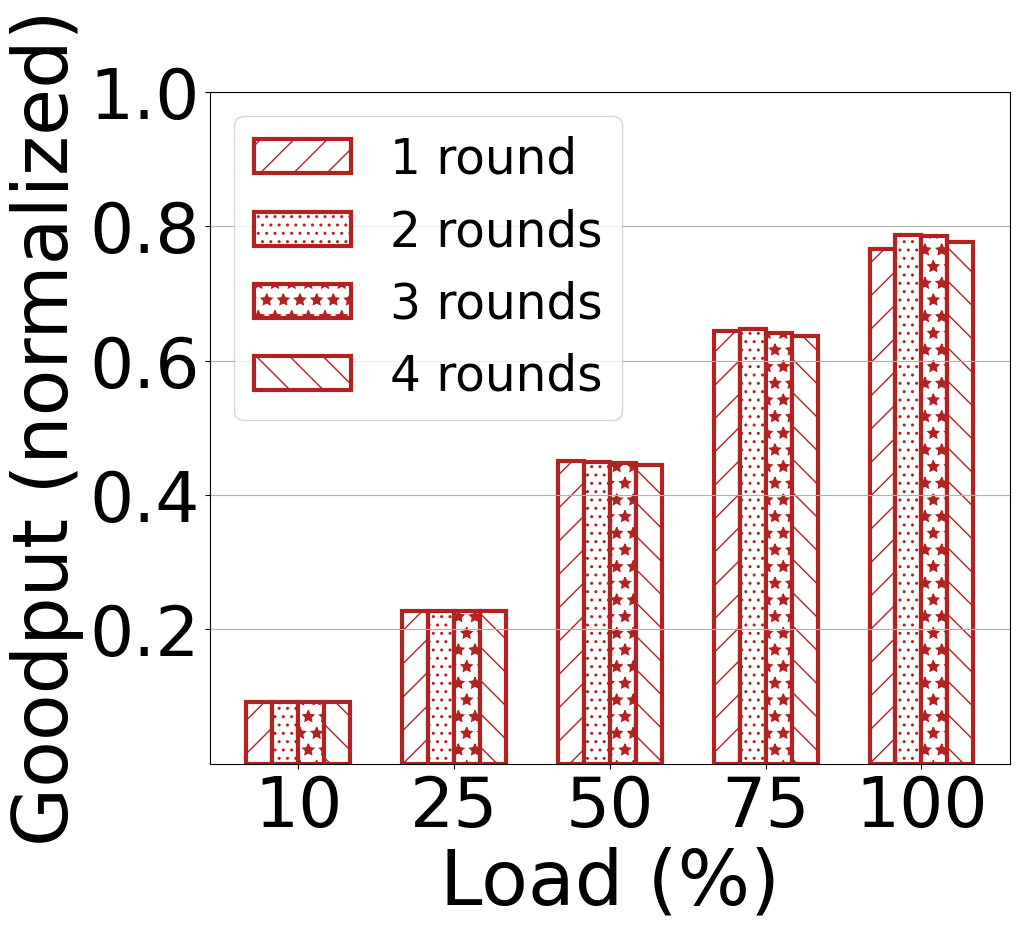

In [25]:
my_figsize = [10, 8]
def goodput_bar_plot(labels):
    results = {}
    i = 0
    for ii, scheme in enumerate(SCHEMES):
        results[scheme] = []
        i = i + 100
        for load in LOADS:
            idx = data[scheme][pias][workload][load][gossip][scheduled]['GOODPUT'][:, 2] > 0
            goodput = data[scheme][pias][workload][load][gossip][scheduled]['GOODPUT'][idx, 1] # goodput
            if ii < 5:
                results[scheme].append(np.mean(goodput)/400)
            else:
                results[scheme].append(np.mean(goodput)/400)


    x_tick = np.arange(len(labels))*0.3 # the label locations
    x = x_tick - (len(SCHEMES)-1)*WIDTH/2

    # hatches = ["xxxx", "", "\\\\", "", "////"]
    # colors = ["white", "black", "white", "white", "white"]

    # schemes = ['Ideal', 'Zeropod', 'Fastpass', 'DCTCP']

    # hatches = ["", ".", "\\", "/", "x", "*", "o"]
    # colors = ["white", "white", "white", "white", "white", "white", "white"]

    # SCHEMES_label = SCHEMES
    # SCHEMES_label = ['NegotiaToR', 'Benes-VLB']
    # SCHEMES_label = ['NegotiaToR(1x)', 'Benes-VLB(1x)', 'Benes-VLB(1.5x)', 'Benes-VLB(2x)']
    # SCHEMES_label = ['multi_dst_grant', 'single_dst_grant']
    # SCHEMES_label = ['100G', '200G', '300G', '400G']
    # SCHEMES_label = ['NegotiaToR(1x)', 'NegotiaToR(2x)', 'NegotiaToR(3x)', 'NegotiaToR(4x)', 'NegotiaToR(5x)']
    # SCHEMES_label = ['Sirius(1x)', 'Sirius(2x)', 'Sirius(3x)', 'Sirius(4x)', 'Sirius(5x)']
    # SCHEMES_label = ['VLB(1x)', 'VLB(2x)', 'VLB(3x)', 'VLB(4x)', 'VLB(5x)']
    # SCHEMES_label = ['Traffic Oblivious (1x)', 'NegotiaToR (1x)', 'Traffic Oblivious (2x)', 'NegotiaToR (2x)', 'Traffic Oblivious (3x)', 'NegotiaToR (3x)']
    # SCHEMES_label = ['NegotiaToR(old)', 'NegotiaToR(new)', 'NegotiaToR(2x)', 'VLB(2x)']
    # SCHEMES_label = ['1-iterative', '3-iterative', '5-iterative', '7-iterative']
    # SCHEMES_label = ['ITER_1', 'ITER_2', 'ITER_3', 'ITER_4', 'ITER_5', 'ITER_6', 'ITER_7']




    fig, ax = plt.subplots(figsize=my_figsize)
    plt.subplots_adjust(left=0.16, right=0.96, bottom=0.15, top=0.99)
    

    
    for i, scheme in enumerate(SCHEMES):
        # bound = len(SCHEMES_label) / 2
        # if i < bound:
        #     ax.bar(x + WIDTH*i, results[scheme], WIDTH, edgecolor="firebrick", color=[colors[i]], label=SCHEMES_label[i], hatch=hatches[i], linewidth = 3)
        # else:
        #     ax.bar(x + WIDTH*(i), results[scheme], WIDTH, edgecolor="darkblue", color=[colors[i]], label=SCHEMES_label[i], hatch=hatches[i], linewidth = 3)
        ax.bar(x + WIDTH*(i), results[scheme], WIDTH, edgecolor="firebrick", color=[colors[i]], label=SCHEMES_label[i], hatch=hatches[i], linewidth = 3)


    # ax.set_title('Accelerate by adding line rate', fontsize=my_fontsize)
    ax.set_ylabel('Goodput (normalized)', fontsize=my_fontsize)
    # ax.set_ylabel('Goodput (Gbps)', fontsize=my_fontsize)
    ax.set_xticks(x_tick)
    # ax.set_xlabel("Incast Degree", fontsize=my_fontsize)
    ax.set_xlabel("Load (%)", fontsize=my_fontsize)
    ax.set_xticklabels(labels, fontsize=my_fontsize)
    ax.legend(ncol=1, loc = "upper left", fontsize=my_fontsize-20)
    # ax.legend(ncol=1, loc = "upper left", fontsize=my_fontsize-5, handlelength = 1.5, borderpad = 0.2,  labelspacing = 0.3, columnspacing = 1.0)

    

    plt.xticks(fontsize=my_fontsize-5)
    # plt.ylim((0, 250))
    # plt.yticks(np.arange(-1,1.01,0.2), [1.0, 0.8, 0.6, 0.4, 0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
    # plt.yticks(np.arange(0,1.01,0.2))
    ax.grid(axis="y")
    plt.yticks([0.2, 0.4, 0.6, 0.8, 1], fontsize=my_fontsize-5)
    

    # ax.set_title("Thin-Clos Topology", fontsize=my_fontsize)


    # figure_path = '../FIGS/'+ WORKLOADS[0] + '/goodput.pdf'
    figure_path = '../FIGS/NegotiaToR Figs/6/goodput.pdf'
    plt.savefig(figure_path, dpi=300, bbox_inches='tight')
# ax = plt.subplot(grid[0, 0])
# slowdown_bar_plot("Mean", labels, WORKLOADS[0], flow_range='Elephant')

# ax = plt.subplot(grid[1, 0])
# # slowdown_bar_plot("Mean", labels, WORKLOADS[0], flow_range='all')
# slowdown_bar_plot("99p", labels, WORKLOADS[0], flow_range='Mice')
# ax = plt.subplot(grid[:, 1])
goodput_bar_plot(labels)